In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model, save_model
from keras.layers import Dense, Input, Dropout, add
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt 

In [18]:
from sklearn import datasets
iris = datasets.load_iris()
iris.keys()
iris_X = iris.data
iris_y = iris.target # 라벨인코딩이 되어있음
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, test_size=0.1, stratify=iris_y)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((135, 4), (135,), (15, 4), (15,))

# 1. 기본적인 DNN(원핫인코딩x)

In [52]:
# 모델설정
# model = Sequential()
# model.add(Input(4,))
# model.add(Dense(units=64, activation='relu'))
# model.add(Dense(units=32, activation='relu'))
# model.add(Dense(units=3, activation='softmax'))
model = Sequential([
    Input(4,),
    Dense(units=64, activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=3, activation='softmax'),
])
model.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_99 (Dense)            (None, 64)                320       
                                                                 
 dense_100 (Dense)           (None, 32)                2080      
                                                                 
 dense_101 (Dense)           (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 학습설정
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=40)
hist = model.fit(train_X, train_y, epochs=1000, verbose=2, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/1000
4/4 - 1s - loss: 1.6348 - accuracy: 0.3148 - val_loss: 1.2393 - val_accuracy: 0.4074 - 632ms/epoch - 158ms/step
Epoch 2/1000
4/4 - 0s - loss: 1.2913 - accuracy: 0.3148 - val_loss: 1.0662 - val_accuracy: 0.4074 - 34ms/epoch - 9ms/step
Epoch 3/1000
4/4 - 0s - loss: 1.0896 - accuracy: 0.3148 - val_loss: 0.9757 - val_accuracy: 0.4074 - 39ms/epoch - 10ms/step
Epoch 4/1000
4/4 - 0s - loss: 0.9591 - accuracy: 0.4630 - val_loss: 0.9261 - val_accuracy: 0.5926 - 35ms/epoch - 9ms/step
Epoch 5/1000
4/4 - 0s - loss: 0.8785 - accuracy: 0.6852 - val_loss: 0.8831 - val_accuracy: 0.5926 - 46ms/epoch - 12ms/step
Epoch 6/1000
4/4 - 0s - loss: 0.8209 - accuracy: 0.6852 - val_loss: 0.8264 - val_accuracy: 0.5926 - 35ms/epoch - 9ms/step
Epoch 7/1000
4/4 - 0s - loss: 0.7580 - accuracy: 0.6852 - val_loss: 0.7546 - val_accuracy: 0.5926 - 40ms/epoch - 10ms/step
Epoch 8/1000
4/4 - 0s - loss: 0.7021 - accuracy: 0.6852 - val_loss: 0.6887 - val_accuracy: 0.5926 - 39ms/epoch - 10ms/step
Epoch 9/1000
4/4 

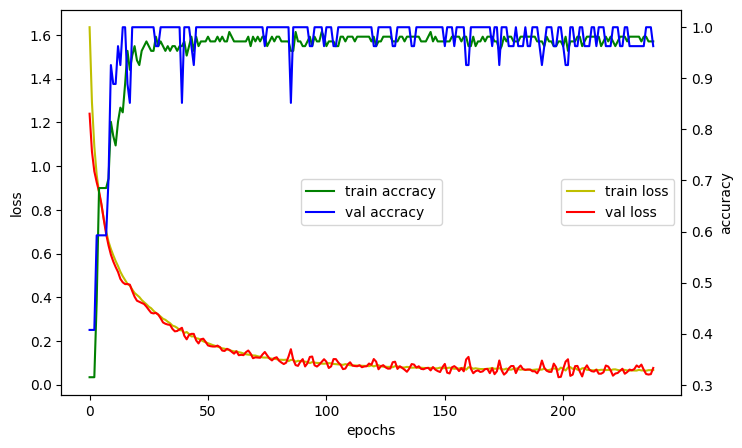

In [54]:
fig, loss_ax = plt.subplots(figsize=(8,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax =loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'center')


# 2. sklearn 이용
- 원핫인코딩을 하지 않고 라벨인코딩까지만 해야 작동. numpy배열

In [59]:
from sklearn.neural_network import MLPClassifier

In [60]:
# 머신러닝 3장 교안 43page
mlp_model = MLPClassifier(hidden_layer_sizes=(64,32),
                      activation='relu',
                      solver='adam',
                      alpha=0.0001,        # 과적합 방지 강도
                      batch_size=40,
                      max_iter=1000,       # epoch
                      early_stopping=True, # 조기종료 활성화(val_loss)
                      n_iter_no_change=50, # patience 
                      validation_fraction=0.1, # 검증셋 비율
                      warm_start=False     # True일 경유 이전학습에 이어서 학습
                      )

In [61]:
mlp_model.fit(train_X, train_y)

MLPClassifier(batch_size=40, early_stopping=True, hidden_layer_sizes=(64, 32),
              max_iter=1000, n_iter_no_change=50)

In [80]:
from sklearn.metrics import recall_score, precision_score
acc = mlp_model.score(test_X, test_y)
yhat = mlp_model.predict(test_X)
recall = recall_score(test_y, yhat, average='weighted')
precision = precision_score(test_y, yhat, average='weighted')
print('정확도:{:.3f}, 재현율:{:.3f}, 정밀도:{:.3f}'.format(acc,recall,precision))

정확도:0.933, 재현율:0.933, 정밀도:0.944


# 3. 클래스 이용

In [81]:
class DNNClassifier:
    @staticmethod
    def build(input_dim=4, activation='relu'):
        model = Sequential()
        model.add(Input(input_dim,))
        model.add(Dense(50, activation=activation))
        model.add(Dense(30, activation=activation))
        model.add(Dense(3, activation='softmax'))
        model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

In [84]:
model = DNNClassifier.build(input_dim=4)
model.summary()
hist = model.fit(train_X, train_y, epochs=500, validation_split=0.2)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 50)                250       
                                                                 
 dense_109 (Dense)           (None, 30)                1530      
                                                                 
 dense_110 (Dense)           (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 1s 60ms/step - loss: 1.2137 - accuracy: 0.3519 - val_loss: 1.1117 - val_accuracy: 0.0741
Epoch 2/500
4/4 [==============================] - 0s 12ms/step - loss: 1.0869 - accuracy: 0.2130 - val_loss: 0.9831 - val_accuracy: 0.4074
Epoch 3/500
4/4 [==================

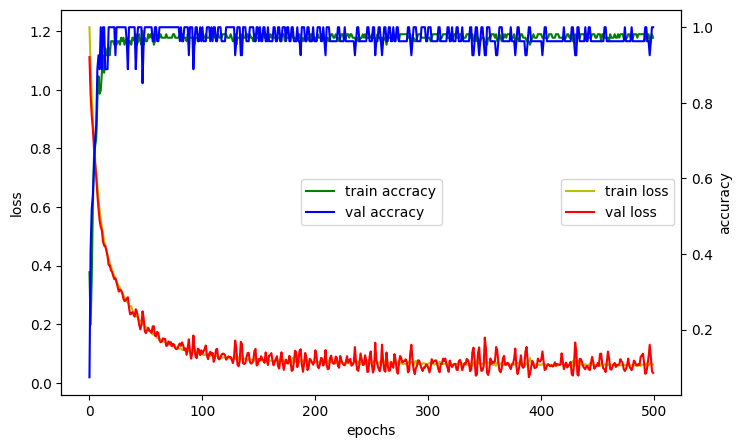

In [ ]:
fig, loss_ax = plt.subplots(figsize=(8,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax =loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'center')

In [88]:
loss, acc = model.evaluate(test_X, test_y)
loss, acc


1/1 [==============================] - 0s 32ms/step - loss: 0.0287 - accuracy: 1.0000


(0.028737468644976616, 1.0)

# 4. 함수형 API이용하기
- 병렬처리  : 속도를 높이기 위해
- 레지듀얼 블록(Residual block) : 모델의 성능을 높이려고(자연어처리, 이미지처리)

In [90]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras import Model
from keras.layers import Dense, Input, add, concatenate # 병렬처리

In [94]:
# 기존 model 스타일 4 -> 50 -> 30 -> 3
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=30, activation='relu')(dense1)
dense3 = Dense(units=3, activation='softmax')(dense2)
model = Model(inputs=input_, outputs=dense3)
model.summary()
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=200, validation_split=0.2)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 4)]               0         
                                                                 
 dense_120 (Dense)           (None, 50)                250       
                                                                 
 dense_121 (Dense)           (None, 30)                1530      
                                                                 
 dense_122 (Dense)           (None, 3)                 93        
                                                                 
Total params: 1,873
Trainable params: 1,873
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
4/4 [==============================] - 1s 66ms/step - loss: 1.1183 - accuracy: 0.3889 - val_loss: 1.0958 - val_accuracy: 0.4444
Epoch 2/200
4/4 [==============================] 

In [96]:
# 병렬처리
# 4 -> 16-(50,80,30로 병렬처리) -> 32 -> 3
input_ = Input(shape=(4,))
dense1 = Dense(units=50, activation='relu')(input_)
dense2 = Dense(units=80, activation='relu')(input_)
dense3 = Dense(units=30, activation='relu')(input_)
x = concatenate([dense1, dense2, dense3])
#x = Dense(160 ,activation='relu')(input_)의 병렬처리
dense4 = Dense(32, activation='relu')(x)
output = Dense(3, activation='softmax')(dense4)
model = Model(inputs=input_, outputs=output)
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_44 (InputLayer)          [(None, 4)]          0           []                               
                                                                                                  
 dense_128 (Dense)              (None, 50)           250         ['input_44[0][0]']               
                                                                                                  
 dense_129 (Dense)              (None, 80)           400         ['input_44[0][0]']               
                                                                                                  
 dense_130 (Dense)              (None, 30)           150         ['input_44[0][0]']               
                                                                                            

In [98]:
# 레지듀얼블록(Residual Block) : 딥러닝에서 딥한 네트워크가 학습이 잘 되지 않을 때
# 4 -> 50 -> 50 -> (레지듀얼) -> 3
input_ = Input(shape=(4,))
dense1 = Dense(50, activation='relu')(input_)
dense2 = Dense(50, activation='relu')(dense1)
dense3 = add([dense1, dense2])
output = Dense(3, activation='softmax')(dense3)
model = Model(inputs=input_, outputs=output)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_X, train_y, epochs=500, validation_split=0.2 )

Epoch 1/500
4/4 [==============================] - 1s 73ms/step - loss: 1.1370 - accuracy: 0.2037 - val_loss: 1.0541 - val_accuracy: 0.1111
Epoch 2/500
4/4 [==============================] - 0s 15ms/step - loss: 1.0087 - accuracy: 0.2407 - val_loss: 0.9484 - val_accuracy: 0.3333
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 0.9161 - accuracy: 0.4167 - val_loss: 0.8461 - val_accuracy: 0.7037
Epoch 4/500
4/4 [==============================] - 0s 14ms/step - loss: 0.8360 - accuracy: 0.5278 - val_loss: 0.7748 - val_accuracy: 0.7037
Epoch 5/500
4/4 [==============================] - 0s 15ms/step - loss: 0.7618 - accuracy: 0.5648 - val_loss: 0.7111 - val_accuracy: 0.5926
Epoch 6/500
4/4 [==============================] - 0s 15ms/step - loss: 0.6925 - accuracy: 0.6389 - val_loss: 0.6531 - val_accuracy: 0.8148
Epoch 7/500
4/4 [==============================] - 0s 13ms/step - loss: 0.6386 - accuracy: 0.7685 - val_loss: 0.5992 - val_accuracy: 0.8889
Epoch 8/500
4/4 [===

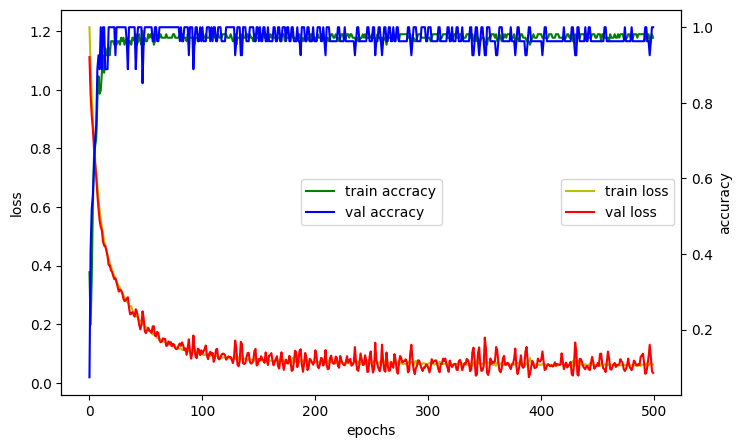

In [99]:
fig, loss_ax = plt.subplots(figsize=(8,5))
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
acc_ax =loss_ax.twinx()
acc_ax.plot(hist.history['accuracy'], 'g', label='train accracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val accracy')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc = 'center right')
acc_ax.legend(loc = 'center')
